## Note: This is a scratch notebook that is used while trying to implement the report

# Problem Statement

## From Researcher
This dataset gathered SSVEP-BCI recordings of 35 healthy subjects (17 females, aged 17-34 years, mean age: 22 years) focusing on 40 characters flickering at different frequencies (8-15.8 Hz with an interval of 0.2 Hz). For each subject, the experiment consisted of 6 blocks. Each block contained 40 trials corresponding to all 40 characters indicated in a random order. Each trial started with a visual cue (a red square) indicating a target stimulus. The cue appeared for 0.5 s on the screen. Subjects were asked to shift their gaze to the target as soon as possible within the cue duration. Following the cue offset, all stimuli started to flicker on the screen concurrently and lasted 5 s. After stimulus offset, the screen was blank for 0.5 s before the next trial began, which allowed the subjects to have short breaks between consecutive trials. Each trial lasted a total of 6 s. To facilitate visual fixation, a red triangle appeared below the flickering target during the stimulation period. In each block, subjects were asked to avoid eye blinks during the stimulation period. To avoid visual fatigue, there was a rest for several minutes between two consecutive blocks.

EEG data were acquired using a Synamps2 system (Neuroscan, Inc.) with a sampling rate of 1000 Hz. The amplifier frequency passband ranged from 0.15 Hz to 200 Hz. Sixty-four channels covered the whole scalp of the subject and were aligned according to the international 10-20 system. The ground was placed on midway between Fz and FPz. The reference was located on the vertex. Electrode impedances were kept below 10 K¶∏. To remove the common power-line noise, a notch filter at 50 Hz was applied in data recording. Event triggers generated by the computer to the amplifier and recorded on an event channel synchronized to the EEG data. 

The continuous EEG data was segmented into 6 s epochs (500 ms pre-stimulus, 5.5 s post-stimulus onset). The epochs were subsequently downsampled to 250 Hz. Thus each trial consisted of 1500 time points. Finally, these data were stored as double-precision floating-point values in MATLAB and were named as subject indices (i.e., S01.mat, °≠, S35.mat). For each file, the data loaded in MATLAB generate a 4-D matrix named °Ædata°Ø with dimensions of [64, 1500, 40, 6]. The four dimensions indicate °ÆElectrode index°Ø, °ÆTime points°Ø, °ÆTarget index°Ø, and °ÆBlock index°Ø. The electrode positions were saved in a °Æ64-channels.loc°Ø file. Six trials were available for each SSVEP frequency. Frequency and phase values for the 40 target indices were saved in a °ÆFreq_Phase.mat°Ø file.

Information for all subjects was listed in a °ÆSub_info.txt°Ø file. For each subject, there are five factors including °ÆSubject Index°Ø, °ÆGender°Ø, °ÆAge°Ø, °ÆHandedness°Ø, and °ÆGroup°Ø. Subjects were divided into an °Æexperienced°Ø group (eight subjects, S01-S08) and a °Ænaive°Ø group (27 subjects, S09-S35) according to their experience in SSVEP-based BCIs.


## Summary
1.วัดหัว 64 จุด sampling rate 250 Hz

2.มีคน 35 คน แต่ละคนทำการทดลอง 6 blocks มีเวลาพัก 2-3 mins ระหว่าง block ที่ติดกันครับ

3.ใน 1 Block ประกอบ 40 trials (40 frequencies & phases as presented in an image, random sequence) แต่ละ trial สัญญาณยาว 6 วินาที

4.ใน 1 trial ประกอบไปด้วย 0.5s สำหรับ cue ว่าให้มองที่ไหนจาก 1ใน 40 เป้าหมาย, 5s การ stimulation สมองด้วยความถี่และเฟสนั้นๆ, หลังจากนั้น0.5s จอว่าง แล้วก็วนกลับไป random เป้าหมายใหม่จนครบ 40 ดังข้อ3

## Reference
1. Research Paper
    - https://www.researchgate.net/publication/309897862_A_Benchmark_Dataset_for_SSVEP-Based_Brain-Computer_Interfaces
2. CCA Implementation:
    - https://www.researchgate.net/publication/320572057_Combining_the_Benefits_of_CCA_and_SVMs_for_SSVEP-based_BCIs_in_Real-world_Conditions/download
    - https://stats.stackexchange.com/questions/77287/canonical-correlation-analysis-without-raw-data-algebra-of-cca/77309#77309
    - https://stats.stackexchange.com/questions/65692/how-to-visualize-what-canonical-correlation-analysis-does-in-comparison-to-what
    - https://arxiv.org/pdf/1711.02391.pdf

In [1]:
%matplotlib inline

In [2]:
import scipy.io
import pandas as pd
import xarray as xr
import numpy as np
from pprint import pprint
from functools import reduce
import re
from matplotlib import pyplot as plt

In [3]:
f = open("./data/64-channels.loc", "r")
lines = re.split('\n', f.read())
electrodes = []
for line in lines:
    electrodes.append(list(filter(lambda text: len(text) > 0, re.split('\s', line))))
electrodes = list(filter(lambda l: len(l) > 0, electrodes))
elec_to_elec_id_map = {}
elec_id_to_elec_map = {}
for i in range(len(electrodes)):
    elec_to_elec_id_map[electrodes[i][3]] = int(electrodes[i][0])
    elec_id_to_elec_map[int(electrodes[i][0])] = electrodes[i][3]

In [4]:
elec_to_elec_id_map

{'FP1': 1,
 'FPZ': 2,
 'FP2': 3,
 'AF3': 4,
 'AF4': 5,
 'F7': 6,
 'F5': 7,
 'F3': 8,
 'F1': 9,
 'FZ': 10,
 'F2': 11,
 'F4': 12,
 'F6': 13,
 'F8': 14,
 'FT7': 15,
 'FC5': 16,
 'FC3': 17,
 'FC1': 18,
 'FCz': 19,
 'FC2': 20,
 'FC4': 21,
 'FC6': 22,
 'FT8': 23,
 'T7': 24,
 'C5': 25,
 'C3': 26,
 'C1': 27,
 'Cz': 28,
 'C2': 29,
 'C4': 30,
 'C6': 31,
 'T8': 32,
 'M1': 33,
 'TP7': 34,
 'CP5': 35,
 'CP3': 36,
 'CP1': 37,
 'CPZ': 38,
 'CP2': 39,
 'CP4': 40,
 'CP6': 41,
 'TP8': 42,
 'M2': 43,
 'P7': 44,
 'P5': 45,
 'P3': 46,
 'P1': 47,
 'PZ': 48,
 'P2': 49,
 'P4': 50,
 'P6': 51,
 'P8': 52,
 'PO7': 53,
 'PO5': 54,
 'PO3': 55,
 'POz': 56,
 'PO4': 57,
 'PO6': 58,
 'PO8': 59,
 'CB1': 60,
 'O1': 61,
 'Oz': 62,
 'O2': 63,
 'CB2': 64}

In [5]:
PI = np.pi

In [6]:
mat = scipy.io.loadmat('./data/S1.mat')
raw_data = mat['data']

In [7]:
target_setting_info = scipy.io.loadmat('./data/Freq_Phase.mat')

In [8]:
target_setting = pd.DataFrame.from_dict({
    "frequency": target_setting_info['freqs'][0],
    "phase": target_setting_info['phases'][0]
})

In [9]:
num_electrode = len(mat['data'])
print(num_electrode)

64


In [10]:
time_step = len(mat['data'][0])

In [11]:
num_target = len(mat['data'][0][0])

In [12]:
num_block = len(mat['data'][0][0][0])

### 1. Reformat SSVEP data into DataFrame

In [13]:
def get_input_data(raw_data, electrodes, target_id, block_id):
    interest_electrode_ids = []
    for electrode in electrodes:
        interest_electrode_ids.append(elec_to_elec_id_map[electrode])
    result = {}
    for electrode_id in interest_electrode_ids:
        values = []
        for t in range(time_step):
            values.append(raw_data[electrode_id][t][target_id][block_id])
        result[elec_id_to_elec_map[electrode_id]] = values
    return result

In [14]:
interest_channels = ['P3', 'PZ', 'P4', 'PO7', 'POz', 'O1', 'Oz', 'O2', 'PO8']

In [15]:
X_target0_block0 = get_input_data(raw_data, interest_channels, 0, 0)

In [16]:
X_target0_block0_df = pd.DataFrame.from_dict(X_target0_block0)

In [17]:
X_target0_block0_df.head()

,P3,PZ,P4,PO7,POz,O1,Oz,O2,PO8
0,8.446957,9.120697,9.072064,9.346809,5.223561,10.817058,13.878245,14.004127,11.040352
1,10.067551,9.290170,10.602807,12.783862,6.625457,15.501360,17.741278,17.316484,15.027191
2,11.398573,10.156068,11.104850,14.810123,8.620136,18.656847,22.059946,21.006931,18.915430
3,11.913071,11.147848,12.575839,15.364802,10.828325,23.876554,27.135830,27.046423,25.258877
4,11.756350,11.656564,12.264174,15.103699,13.815971,23.120079,26.372831,26.767824,24.441315


In [18]:
# an index of time frame after 0.5s * 250Hz has passed
post_stimulus_time_index = int(0.5 * 250)
post_stimulus_time_index

125

1375


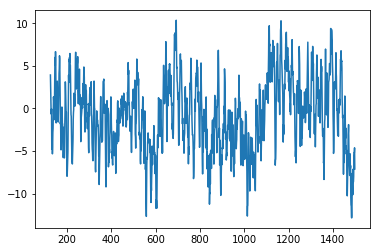

In [19]:
print(len(X_target0_block0_df['P3'][post_stimulus_time_index:]))
plt.plot(X_target0_block0_df['P3'][post_stimulus_time_index:])

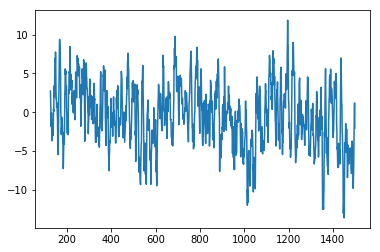

In [20]:
plt.plot(X_target0_block0_df['PZ'][post_stimulus_time_index:])

In [21]:
X_target0_block0_df.head()

,P3,PZ,P4,PO7,POz,O1,Oz,O2,PO8
0,8.446957,9.120697,9.072064,9.346809,5.223561,10.817058,13.878245,14.004127,11.040352
1,10.067551,9.290170,10.602807,12.783862,6.625457,15.501360,17.741278,17.316484,15.027191
2,11.398573,10.156068,11.104850,14.810123,8.620136,18.656847,22.059946,21.006931,18.915430
3,11.913071,11.147848,12.575839,15.364802,10.828325,23.876554,27.135830,27.046423,25.258877
4,11.756350,11.656564,12.264174,15.103699,13.815971,23.120079,26.372831,26.767824,24.441315


### 2. Generate Reference Signal

In [22]:
sin = lambda f, h, t, p: np.sin(2*PI*f*h*t + p)
cos = lambda f, h, t, p: np.cos(2*PI*f*h*t + p)
ref_wave = lambda f, h, t, p: [sin(f, h, t, p), cos(f, h, t, p)]

def generate_reference_signal_at_time(f, t, max_harmonic, phase):
    values = []
    for h in range(1, max_harmonic + 1):
        values += ref_wave(f, h, t, phase)
    return values

def generate_reference_signal(frequency, sampling_frequency, total_time, max_harmonic, phase):
    ref_signal = []
    num_time_step = total_time * sampling_frequency
    for step in range(num_time_step):
        time = step * 1/sampling_frequency
        ref_signal_at_t = generate_reference_signal_at_time(frequency, time, max_harmonic, phase)
        ref_signal.append(ref_signal_at_t)
    return ref_signal

In [23]:
Y = generate_reference_signal(frequency=8, sampling_frequency=250, total_time=6, max_harmonic=6, phase=0)
Y_df = pd.DataFrame(Y)

In [24]:
# columns are [sin, cos] * [number of harmonic]
# rows are time steps
Y_df.loc[:10]

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
1,0.199710,0.979855,0.391374,0.920232,0.567269,0.823533,0.720309,0.693653,0.844328,0.535827,0.934329,0.356412
2,0.391374,0.920232,0.720309,0.693653,0.934329,0.356412,0.999289,-0.037690,0.904827,-0.425779,0.666012,-0.745941
3,0.567269,0.823533,0.934329,0.356412,0.971632,-0.236499,0.666012,-0.745941,0.125333,-0.992115,-0.459580,-0.888136
4,0.720309,0.693653,0.999289,-0.037690,0.666012,-0.745941,-0.075327,-0.997159,-0.770513,-0.637424,-0.993611,0.112856
5,0.844328,0.535827,0.904827,-0.425779,0.125333,-0.992115,-0.770513,-0.637424,-0.951057,0.309017,-0.248690,0.968583
6,0.934329,0.356412,0.666012,-0.745941,-0.459580,-0.888136,-0.993611,0.112856,-0.248690,0.968583,0.816339,0.577573
7,0.986686,0.162637,0.320944,-0.947098,-0.882291,-0.470704,-0.607930,0.793990,0.684547,0.728969,0.830596,-0.556876
8,0.999289,-0.037690,-0.075327,-0.997159,-0.993611,0.112856,0.150226,0.988652,0.982287,-0.187381,-0.224271,-0.974527
9,0.971632,-0.236499,-0.459580,-0.888136,-0.754251,0.656586,0.816339,0.577573,0.368125,-0.929776,-0.990461,-0.137790


1375


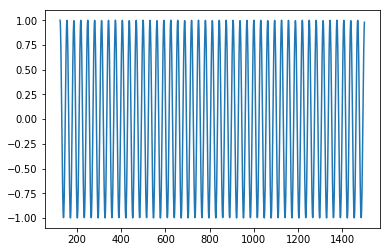

In [25]:
print(len(Y_df.loc[post_stimulus_time_index:][1]))
plt.plot(Y_df.loc[post_stimulus_time_index:][1])

### 3. Optimization to find max ρ (canonial correlation)

### Scratch Paper Section

In [26]:
X = X_target0_block0_df.loc[post_stimulus_time_index:]
Y = Y_df.loc[post_stimulus_time_index:]
if X.shape[0] == Y.shape[0]:
    N = X.shape[0]
else:
    print('time frame is not equal')

In [27]:
print(X.shape)
print(Y.shape)

(1375, 9)
(1375, 12)


In [28]:
C_xx = 1/N * (X.T @ X)
C_xx.shape

(9, 9)

In [29]:
C_yy = 1/N * (Y.T @ Y)
C_yy.shape

(12, 12)

In [30]:
C_xy = 1/N * (X.T @ Y)
C_xy.shape

(9, 12)

In [31]:
C_yx = 1/N * (Y.T @ X)
C_yx.shape

(12, 9)

In [32]:
C_xx_xy = np.concatenate((C_xx, C_xy), axis=1)

In [33]:
C_yx_yy = np.concatenate((C_yx, C_yy), axis=1)

In [34]:
# joint covariance matrix
C = np.concatenate((C_xx_xy, C_yx_yy), axis=0)
C.shape

(21, 21)

In [35]:
C_xx_inv = pd.DataFrame(np.linalg.pinv(C_xx.values), C_xx.columns, C_xx.index)

In [36]:
C_yy_inv = pd.DataFrame(np.linalg.pinv(C_yy.values), C_yy.columns, C_yy.index)

In [37]:
eig_values, eig_vectors = np.linalg.eig(C_yy_inv @ C_yx @ C_xx_inv @ C_xy)

In [38]:
eig_values

array([ 2.15693331e-01,  5.60726990e-02,  3.25143211e-02,  2.17207763e-02,
        7.25353944e-03,  5.07305309e-03,  1.66904961e-03,  9.96000848e-04,
        2.12343409e-04, -5.73679644e-18, -1.79762278e-18,  1.05012692e-18])

In [39]:
eig_vectors

array([[-0.6100051 , -0.33886795,  0.57787116, -0.21889673,  0.15134972,
         0.00306522, -0.22044832,  0.05419428, -0.04201197,  0.19637605,
        -0.0202699 ,  0.0277033 ],
       [-0.5735105 ,  0.32262243, -0.09621757,  0.56509705,  0.05562952,
        -0.06783049,  0.13811323,  0.09387122,  0.3972526 , -0.12494679,
        -0.04660729,  0.16123747],
       [-0.05308645, -0.66986241, -0.05250253,  0.24619857, -0.43544604,
         0.23123531,  0.26948444, -0.02011714,  0.08749186, -0.33452349,
         0.36310772, -0.12134811],
       [ 0.49200167,  0.03986911,  0.67078446,  0.25140501,  0.17705388,
         0.09298295,  0.01434209,  0.0057209 ,  0.30639554, -0.21728283,
         0.04270628,  0.24487169],
       [ 0.00358213,  0.18277993,  0.00794477, -0.44068481, -0.50465266,
        -0.25204128, -0.00617615,  0.38031898,  0.31931935, -0.08764149,
         0.15439304,  0.31050683],
       [-0.00440175, -0.13482756, -0.19513916,  0.09778979,  0.40506761,
        -0.31092724,  

In [40]:
# sqrt of eig_values => "canonical correlations"
sqrt_eig_values = np.sqrt(eig_values)
print(sqrt_eig_values)

[4.64427961e-01 2.36796746e-01 1.80317279e-01 1.47379701e-01
 8.51677136e-02 7.12253683e-02 4.08540036e-02 3.15594811e-02
 1.45720077e-02            nan            nan 1.02475701e-09]


/Users/gentlerainsky/.local/share/virtualenvs/cca-NYNapDeT/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [41]:
max(sqrt_eig_values)

0.4644279609683788

### End Scratch Paper Section

In [45]:
def find_maximum_canonical_correlations(X, Y):
    if X.shape[0] == Y.shape[0]:
        N = X.shape[0]
    else:
        print('time frame is not equal')
        return None
    C_xx = 1/N * (X.T @ X)
    C_yy = 1/N * (Y.T @ Y)
    C_xy = 1/N * (X.T @ Y)
    C_yx = 1/N * (Y.T @ X)
    C_xx_xy = np.concatenate((C_xx, C_xy), axis=1)
    C_yx_yy = np.concatenate((C_yx, C_yy), axis=1)
    # joint covariance matrix
    C = np.concatenate((C_xx_xy, C_yx_yy), axis=0)
    C_xx_inv = pd.DataFrame(np.linalg.pinv(C_xx.values), C_xx.columns, C_xx.index)
    C_yy_inv = pd.DataFrame(np.linalg.pinv(C_yy.values), C_yy.columns, C_yy.index)
    eig_values, eig_vectors = np.linalg.eig(C_yy_inv @ C_yx @ C_xx_inv @ C_xy)
    sqrt_eig_values = np.sqrt(eig_values)
    return max(sqrt_eig_values)


In [46]:
find_maximum_canonical_correlations(
    X = X_target0_block0_df.loc[post_stimulus_time_index:],
    Y = Y_df.loc[post_stimulus_time_index:]
)

/Users/gentlerainsky/.local/share/virtualenvs/cca-NYNapDeT/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


0.4644279609683788